In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive')  # access my drive

Mounted at /content/drive


In [5]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
target_size=(256,256) #provided by network resizing

In [8]:
#bast5dm el swar 3shan a3mlha zoom in w out w rescale 3shan a5od mnha kol el positions 
#ll validation w el training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mydatasets',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mydatasets', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 394 images belonging to 7 classes.
Found 97 images belonging to 7 classes.


In [10]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [11]:
train_generator.class_indices #bcheck 3la el classes el training

{'1': 0, '10': 1, '100': 2, '20': 3, '200': 4, '5': 5, '50': 6}

In [12]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(7, activation='softmax')
])

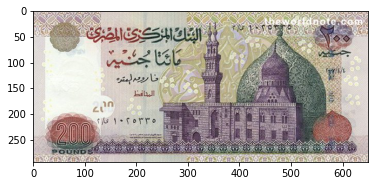

In [13]:
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/mydatasets/200/200.2.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/mydatasets/200/200.2.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [14]:
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

In [15]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"], run_eagerly=True)
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [17]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=20,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
6/6 [==============================] - 60s 8s/step - loss: 0.6408 - accuracy: 0.1758 - val_loss: 0.3943 - val_accuracy: 0.3594
Epoch 2/20
6/6 [==============================] - 18s 3s/step - loss: 0.4643 - accuracy: 0.2552 - val_loss: 0.4168 - val_accuracy: 0.3281
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 0.4657 - accuracy: 0.2000 - val_loss: 0.3896 - val_accuracy: 0.3750
Epoch 4/20
6/6 [==============================] - 14s 2s/step - loss: 0.4424 - accuracy: 0.2879 - val_loss: 0.3868 - val_accuracy: 0.3594
Epoch 5/20
6/6 [==============================] - 14s 2s/step - loss: 0.4303 - accuracy: 0.2636 - val_loss: 0.3899 - val_accuracy: 0.2812
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 0.4254 - accuracy: 0.2606 - val_loss: 0.3745 - val_accuracy: 0.3125
Epoch 7/20
6/6 [==============================] - 14s 3s/step - loss: 0.4253 - accuracy: 0.2697 - val_loss: 0.3486 - val_accuracy: 0.5000
Epoch 8/20
6/6 [==================

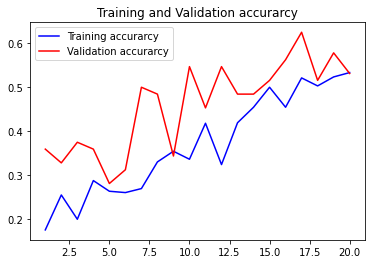

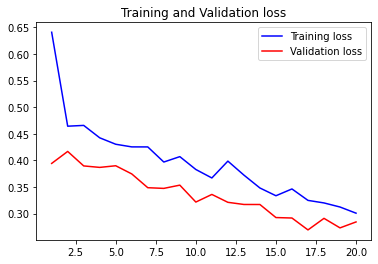

In [18]:
import matplotlib
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [19]:
from tensorflow.keras.models import load_model
model.save('Currency.h5')

In [20]:
model.save_weights('currency_weight.h5')

In [21]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'1': 0, '10': 1, '100': 2, '20': 3, '200': 4, '5': 5, '50': 6}

In [22]:
Classes = ["1","10","100","20","200","5","50"]

1/1 [==============================] - 0s 20ms/step
5


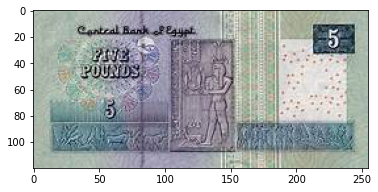

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=256
img_height=256
from tensorflow.keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/5/5.9.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/5/5.9.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 19ms/step
50


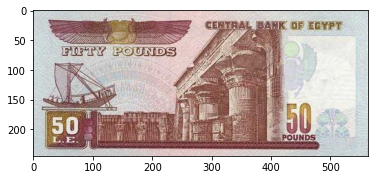

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)  
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/50/50.9.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/50/50.9.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 19ms/step
50


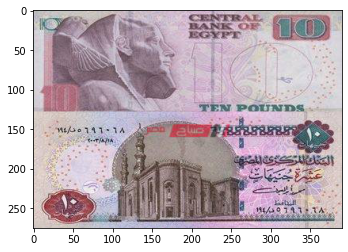

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/10/10.9.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/10/10.9.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 26ms/step
20


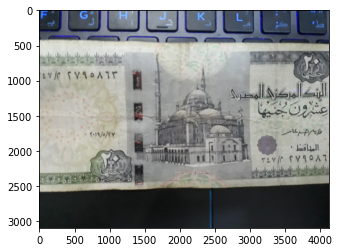

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/20/20.9.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/20/20.9.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 19ms/step
100


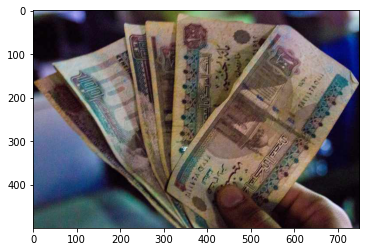

In [43]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/100/100.11.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/100/100.11.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 23ms/step


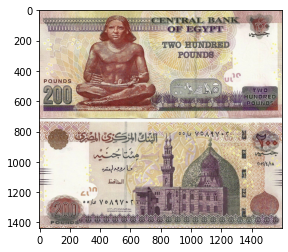

In [46]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/My Drive/mydatasets/200/200.5.jpg')])
Animal=image.load_img('/content/drive/My Drive/mydatasets/200/200.5.jpg')
plt.imshow(Animal)
#print (Classes[int(result)])

1/1 [==============================] - 0s 21ms/step
1


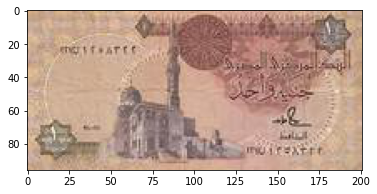

In [48]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/1/1.6.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/1/1.6.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 21ms/step
20


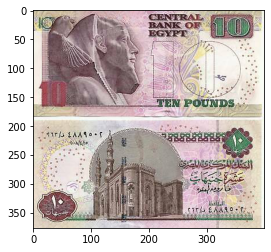

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/10/10.14.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/10/10.14.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 21ms/step
200


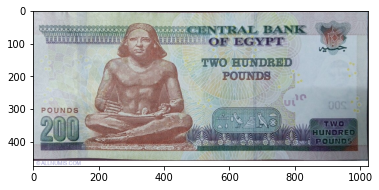

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/200/200.13.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/200/200.13.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 19ms/step
100


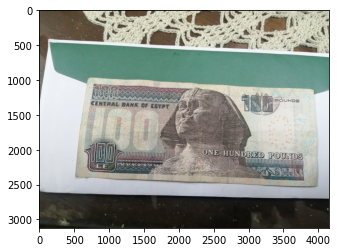

In [52]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/100/100.1.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/100/100.1.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

1/1 [==============================] - 0s 22ms/step
5


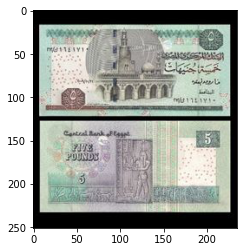

In [53]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result=np.argmax(model.predict(prepare('/content/drive/My Drive/mydatasets/5/5.18.jpg')), axis=-1)
Currency=image.load_img('/content/drive/My Drive/mydatasets/5/5.18.jpg')
plt.imshow(Currency)
print (Classes[int(result)])

In [34]:
#bast5dm el swar 3shan a3mlha zoom in w out w rescale 3shan a5od mnha kol el positions 
#ll validation w el training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)